In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore')

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
# 2.1 Check number of observations and columns
print(train.shape)
print(test.shape)
# Train has one more column the predictor variable SalePrice than the test data
print(set(train.columns)-set(test.columns))

(1460, 81)
(1459, 80)
{'SalePrice'}


In [4]:
# 2.2 Check the number of observations, data types and NAN for each variable
print(train.info())
print('-----------------------'*3)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

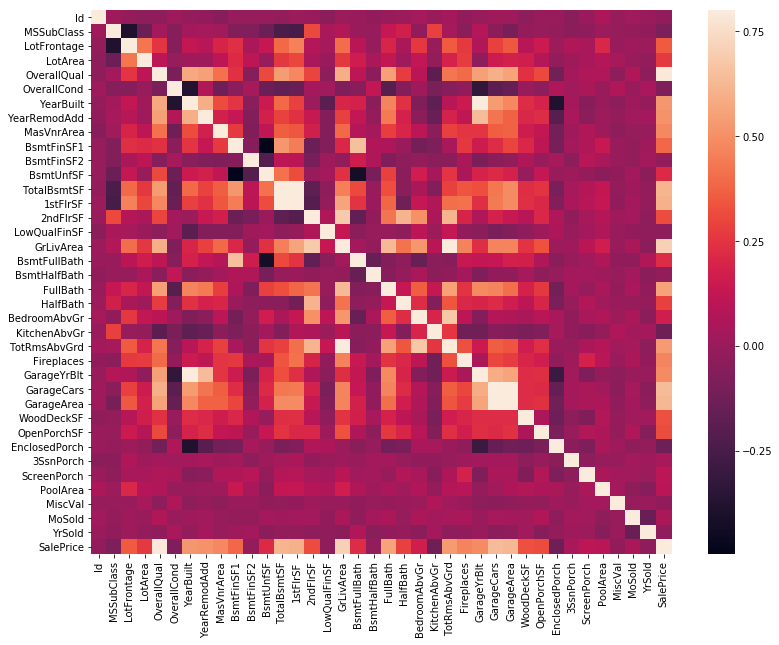

In [5]:
plt.figure(figsize=(13,10))
sns.heatmap(train.corr(), vmax=0.8)

In [6]:
train.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'], axis=1, inplace=True)
test.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'], axis=1, inplace=True)

In [7]:
N_feature = 11

# Top N numeric features correlated with SalePrice
train.corr()['SalePrice'].abs().sort_values(ascending=False).head(N_feature)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

In [9]:
top_corr_features = train.corr()['SalePrice'].abs().sort_values(ascending=False).head(N_feature).index
top_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces'],
      dtype='object')

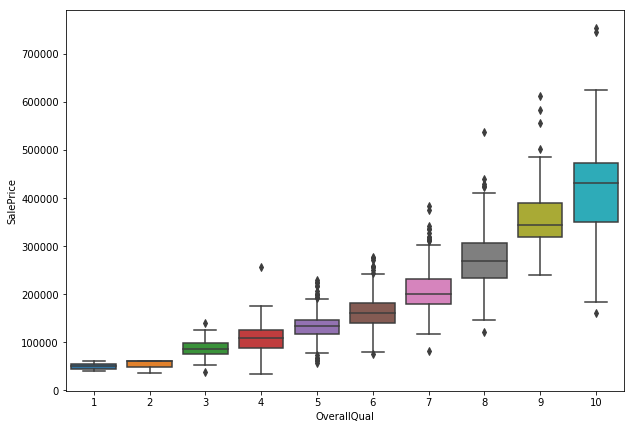

In [10]:
# Box-plot to check relationship between SalePrice and OverallQual
plt.figure(figsize=(10,7))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

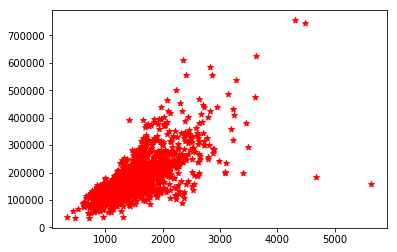

In [11]:
# Scatterplot to check the relationship between SalePrice and GrLivArea
plt.scatter(x='GrLivArea', y='SalePrice', data=train, color='r', marker='*')
train['GrLivArea'].sort_values(ascending=False).head(2)

In [12]:
print(train.shape)
train.drop(train.index[[523, 1298]], inplace=True)
print(train.shape)

(1460, 78)
(1458, 78)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces'],
      dtype='object')


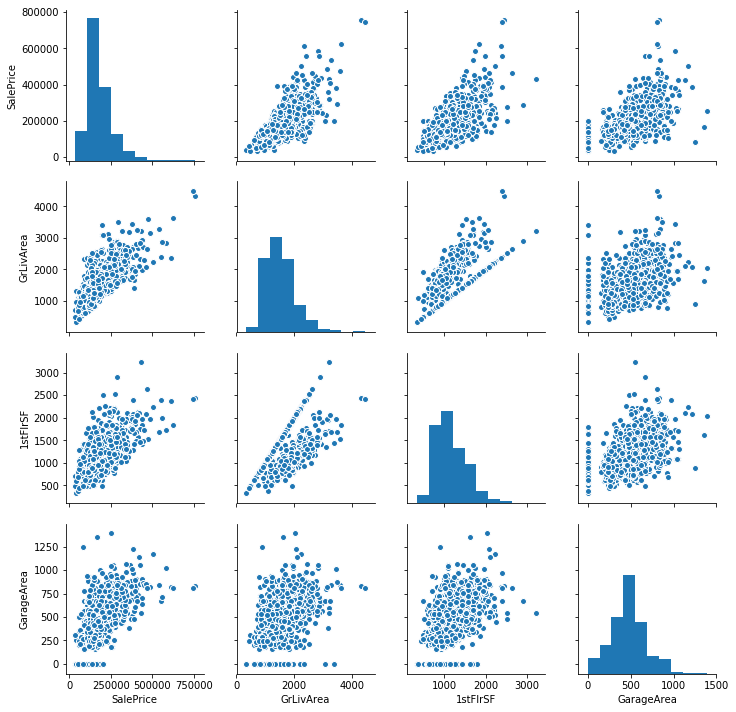

In [13]:
print(top_corr_features)
scatter_feature=['SalePrice', 'GrLivArea','1stFlrSF','GarageArea']
# Use sns.pairplot to check the relationship between the SalePrice and top 10 correlated features
sns.pairplot(train[scatter_feature])

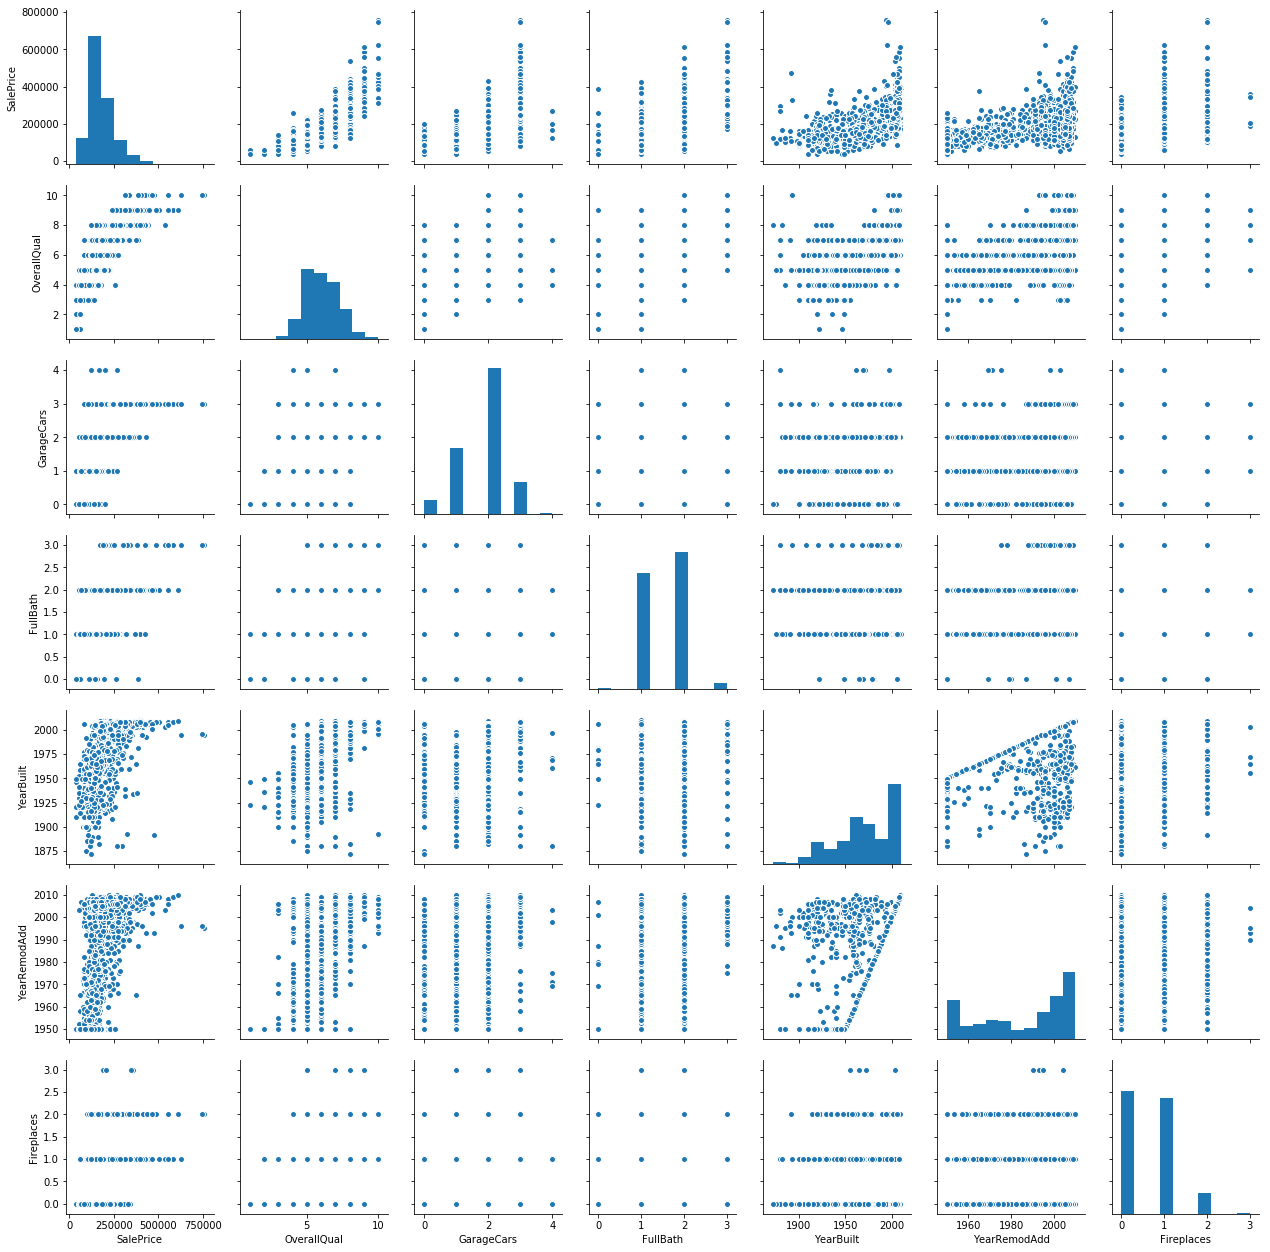

In [14]:
box_feature=['SalePrice','OverallQual','GarageCars','FullBath', 'YearBuilt','YearRemodAdd','Fireplaces']
sns.pairplot(train[box_feature], kind='scatter', diag_kind='hist')

In [15]:
train.isnull().sum().sort_values(ascending=False)
# Check the NAN values as percentage
train_nan_pct=(train.isnull().sum())/(train.isnull().count())
train_nan_pct = train_nan_pct[train_nan_pct>0]
train_nan_pct.sort_values(ascending=False)

PoolQC          0.995885
MiscFeature     0.962963
Alley           0.937586
Fence           0.807270
FireplaceQu     0.473251
LotFrontage     0.177641
GarageType      0.055556
GarageFinish    0.055556
GarageQual      0.055556
GarageCond      0.055556
BsmtExposure    0.026063
BsmtFinType2    0.026063
BsmtFinType1    0.025377
BsmtCond        0.025377
BsmtQual        0.025377
MasVnrArea      0.005487
MasVnrType      0.005487
Electrical      0.000686
dtype: float64

In [16]:
# NAN率>30%の特徴はドロップ
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [17]:
train_impute_index=train_nan_pct[train_nan_pct<0.3].index
train_impute_index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [18]:
train_impute_mode=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train_impute_median=['LotFrontage', 'MasVnrArea']

In [19]:
# Impute character feature with mode
for feature in train_impute_mode:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)
    
# Impute numeric feature with median
for feature in train_impute_median:
    train[feature].fillna(train[feature].median(), inplace=True)
    test[feature].fillna(test[feature].median(), inplace=True)

In [20]:
# There are no nan values in train
train.isnull().sum().sort_values(ascending=False).head(5)

SalePrice       0
BsmtFinSF2      0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
dtype: int64

In [21]:
test_only_nan=test.isnull().sum().sort_values(ascending=False)
test_only_nan=test_only_nan[test_only_nan>0]
test_only_nan.index

Index(['MSZoning', 'BsmtFullBath', 'Utilities', 'BsmtHalfBath', 'Functional',
       'BsmtFinSF2', 'GarageArea', 'BsmtFinSF1', 'SaleType', 'BsmtUnfSF',
       'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual'],
      dtype='object')

In [22]:
test_impute_mode=['MSZoning', 'BsmtFullBath', 'Utilities','BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']
test_impute_median=['BsmtFinSF2','GarageArea', 'BsmtFinSF1','BsmtUnfSF' ]

# Impute test character feature with mode
for feature in test_impute_mode:
    test[feature].fillna(test[feature].mode()[0], inplace=True)
#Impute test numeric feature with median
for feature in test_impute_median:
    test[feature].fillna(test[feature].median(), inplace=True)


In [23]:
# Now there are no NAN values in both train and test data
test.isnull().sum().sort_values(ascending=False).head(5)

SaleCondition    0
SaleType         0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
dtype: int64

In [24]:
# Store the test data ID for competition purpose
TestId=test['Id']

total_features=pd.concat((train.drop(['Id','SalePrice'], axis=1), test.drop(['Id'], axis=1)))
total_features=pd.get_dummies(total_features, drop_first=True)
train_features=total_features[0:train.shape[0]]
test_features=total_features[train.shape[0]:]

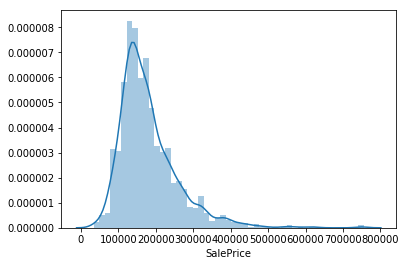

In [25]:
sns.distplot(train['SalePrice'])

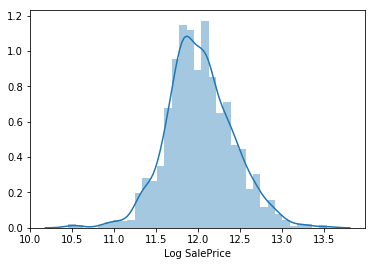

In [26]:
train['Log SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train['Log SalePrice'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train[['SalePrice']], test_size=0.3, random_state=100)

[26697.303926084725, 26469.23813976689, 25942.271845124207, 25156.314612123606, 24157.91451346724, 23427.013196212258, 23082.34944125681, 23281.100332044327]


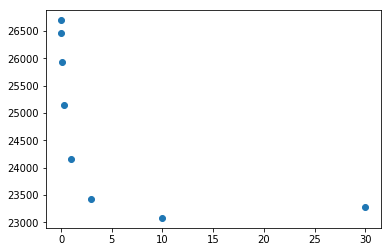

In [28]:
# Import Ridge regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

[23102.181773889162, 23094.728753036674, 23089.111881339126, 23085.059940416093, 23082.34944125681, 23080.794653097757, 23080.24004351581, 23080.554470542185, 23081.62666741745, 23083.361694306805, 23085.678122466354, 23088.505779592615]
11.0


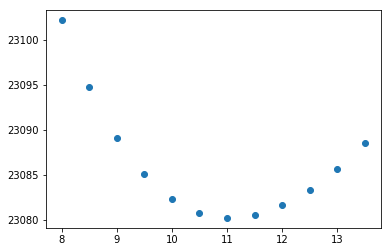

In [29]:
# Adjust alpha based on previous result
alpha=np.arange(8,14, 0.5)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())

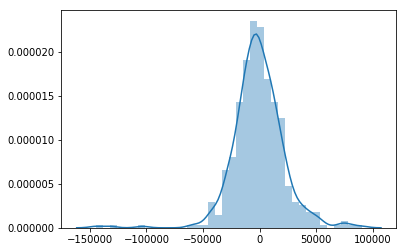

In [30]:
# Check whether the residual satisfy the normality condition
ridge = Ridge(alpha=11)
# Use all training data to fit the model
ridge.fit(X_train, y_train)
predicted = ridge.predict(X_val)
residual_y=predicted-y_val
sns.distplot(residual_y)

In [31]:
stats.normaltest(residual_y)

NormaltestResult(statistic=array([94.84161101]), pvalue=array([2.54334831e-21]))

In [32]:
# Use alpha=11 to predict the test data
ridge=Ridge(alpha=11)
# Use all training data to fit the model
ridge.fit(train_features, train[['SalePrice']])
predicted=ridge.predict(test_features)

In [33]:
submission=pd.DataFrame()
submission['Id']=TestId
submission['SalePrice']=predicted
submission.to_csv('submission.csv', index=False)

## Log SalePrice ver.

[0.13198974506294142, 0.13097401961204938, 0.12866030583867, 0.1253960757607806, 0.12187427968670438, 0.11983459901245168, 0.11881841908044562, 0.11968291981695321]


10.0

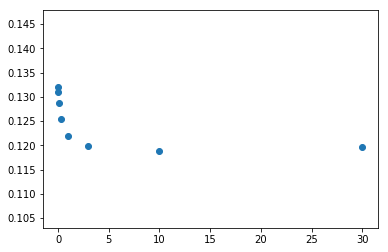

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(train_features, train[['Log SalePrice']], test_size=0.3, random_state=100)

# Import Ridge regression from sklearn
from sklearn.linear_model import Ridge
# Evaluate model performance using root mean square error
from sklearn.metrics import mean_squared_error
rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
rmse.argmin()

[0.11888607322288289, 0.11886094502940095, 0.11884176617608026, 0.11882779880491459, 0.11881841908044562, 0.11881309514777193, 0.11881137025646585, 0.11881284963242669, 0.11881719012145955, 0.11882409191788537, 0.11883329188565755, 0.11884455811247292]
11.0


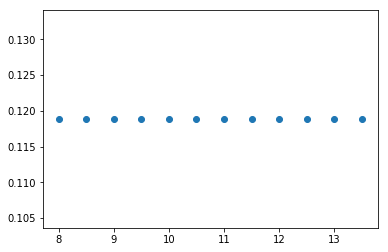

In [92]:
# Adjust alpha based on previous result
alpha=np.arange(8,14, 0.5)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
rmse=pd.Series(rmse, index=alpha)
print(rmse.argmin())

In [94]:
# Use alpha=11 to predict the test data
ridge=Ridge(alpha=11)
# Use all training data to fit the model
ridge.fit(train_features, train[['Log SalePrice']])
predicted_log_price=ridge.predict(test_features)

In [95]:
# Transform back the log(SalePrice+1) to SalePrice
Test_price=np.expm1(predicted_log_price)
Test_price

array([[112992.93229662],
       [148516.62005522],
       [181055.07223818],
       ...,
       [172338.4743279 ],
       [117377.48150549],
       [222060.21803383]])

In [90]:
submission=pd.DataFrame()
submission['Id']=TestId
submission['SalePrice']=Test_price
submission.to_csv('submission.csv', index=False)

In [106]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV
# clf = lgb.LGBMRegressor()
    
# gridParams = {
#     'learning_rate': [0.005],
#     'n_estimators': [40],
#     'num_leaves': [6,8,12,16],
#     'boosting_type' : ['gbdt'],
#     'objective' : ['binary'],
#     'random_state' : [501], # Updated from 'seed'
#     'colsample_bytree' : [0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     }

# # grid_search = GridSearchCV(clf, param_grid=params, cv=4, scoring='neg_mean_squared_error')

# # grid_search.fit(X_train, y_train)

In [107]:
grid_search.grid_scores_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.